## The briefing

Problem: Many contractors have faced a major loss, not because of the business itself but because of the location, so I have been making a solution for this;

Where To Set A Business Up?

Setting Up a business can already be hard but finding a location for it can be just as challenging so as a result I have developed some code to find the ideal neighbourhood for a business to grow in Toronto. This factor is very important as staff and customers depend on this factor and when there is a good customer and staff base from a good location, a business really grows and generates a large amount of profit for the contractor. We will be using clustering to achieve this.

The Data To Be Used

I will be using foursquare and list the best neighbourhoods by finding the ones with most venues, the most common venues in a neighbourhood to do this and also I will get the neighbourhoods with the most incomes from this dataset - Demographics of Toronto neighbourhoods - Wikipedia. Then with these conditions I will cluster the locations on a map and display it.

 
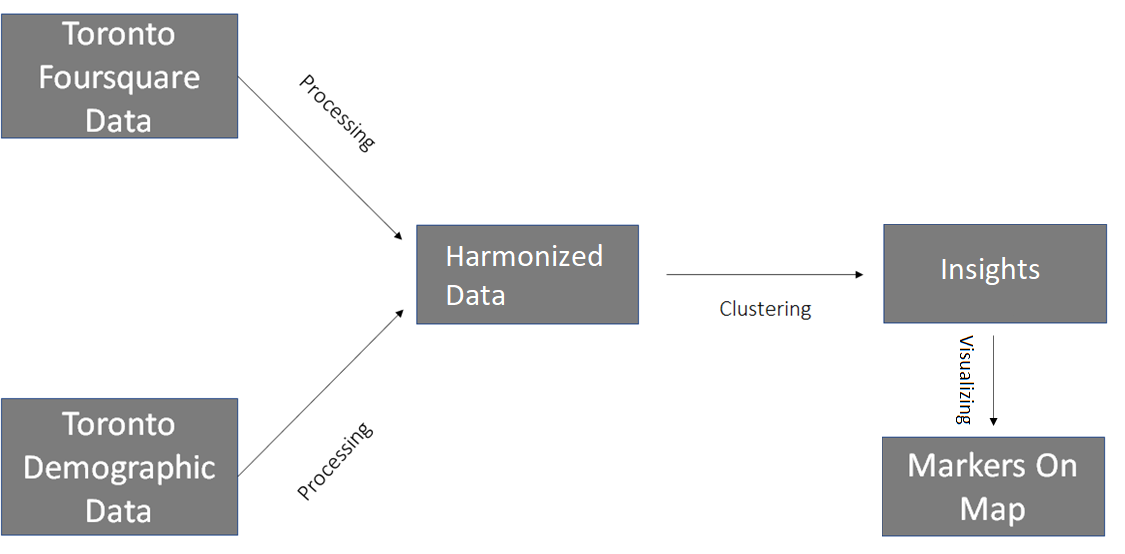

# Getting Foursquare Data Of Toronto

### I will be reusing my code from the last assignment

## Importing Libraries And Providing the URL

In [ ]:
!pip install folium

In [349]:

from bs4 import BeautifulSoup
import pandas as pd
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import numpy as np

url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" # I had to get the url in the discussions tab


## Getting the Webpage's Content

Here we find all the tables in the webpage and if a row is 'Not Assigned' We ignore it with a pass and we move on. we then append the table contents to an array called table_contents

In [350]:

html_doc = requests.get(url).text
soup = BeautifulSoup(html_doc, 'html.parser')

#print(soup.prettify())

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)



## Converting To DataFrame

After we have stored our content in the array, we now read it into a dataframe and replace some column names with more suitable names for our processing.

In [351]:
    # print(table_contents)
    df=pd.DataFrame(table_contents)
    df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                                 'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                                 'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                                 'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

    df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


## Merging The Two Datasets

We merge the two datasets using the pd.merge() method

In [352]:
df2 = pd.read_csv('Geospatial_Coordinates.csv')

df2 = df2.rename(columns={'Postal Code': 'PostalCode'}) # had to rename the column for the merging

final_dataframe = pd.merge(df, df2, on='PostalCode')


final_dataframe= final_dataframe[final_dataframe['Borough'].str.contains('Toronto', na = False)].reset_index(drop=True)
final_dataframe

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


## Now I will be scraping the demographic data of neighbourhoods for Scarborough (An area in Toronto)

In [353]:
demographic_data_url = "https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods"

html_doc = requests.get(demographic_data_url).text
soup = BeautifulSoup(html_doc, 'html.parser')

#print(soup.prettify())

tables = soup.find_all('table')

demographic_data = pd.DataFrame(columns=['Neighborhood', 'Population', 'Income'])


for row in tables[5].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != []:
        name = col[0].text.replace('\n', "")
        population = col[3].text.replace('\n', "").replace(',', "")
        income = col[7].text.replace('\n', "").replace(',', "")
        
        demographic_data = demographic_data.append({'Neighborhood': name, 'Population': population, 'Income': income}, ignore_index=True)
        
demographic_data



,Neighborhood,Population,Income
0,Toronto CMA Average,5113149,40704
1,Agincourt,44577,25750
2,Alexandra Park,4355,19687
3,Allenby,2513,245592
4,Amesbury,17318,27546
...,...,...,...
151,Woburn,48507,26190
152,Wychwood,4182,53613
153,York Mills,17564,92099
154,York University Heights,26140,24432


## Now to get the foursquare data, we use the code below

In [354]:
CLIENT_ID = '<?>' # your Foursquare ID
CLIENT_SECRET = '<?>' # your Foursquare Secret
VERSION = '<?>' # Foursquare API version
LIMIT = ? # A default Foursquare API limit value

neighborhood_latitude = "43.651070"
neighborhood_longitude = "-79.347015"

neighborhood_name = "Toronto"

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

radius = 1000

# type your answer here
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


results = requests.get(url2).json()
results

Latitude and longitude values of Toronto are 43.651070, -79.347015.


{'meta': {'code': 200, 'requestId': '6105048ac616c1266045d02f'},
 'response': {'headerLocation': 'Downtown Toronto',
  'headerFullLocation': 'Downtown Toronto, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 43.66007000900001,
    'lng': -79.33459965976228},
   'sw': {'lat': 43.642069990999985, 'lng': -79.35943034023772}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52adedf011d24be20f5c4a8f',
       'name': 'BATLgrounds',
       'location': {'address': '33 Villiers St',
        'crossStreet': 'Villiers St. & Cherry St.',
        'lat': 43.647088182411316,
        'lng': -79.35130597436181,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.647088182411316,
          'lng': -79.3513059

## I will reuse the code from my previous assignment and borrow the function the gets the nearby venues in the area

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Calling the function and getting Toronto data

In [355]:
toronto_data = getNearbyVenues(final_dataframe['Neighborhood'], final_dataframe['Latitude'], final_dataframe['Longitude'], radius=1000)

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

## Looking at the data

In [356]:
toronto_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


## Plotting the locations on a map with the help of Folium

In [357]:
map_toronto = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(final_dataframe['Latitude'], final_dataframe['Longitude'], final_dataframe['Borough'], final_dataframe['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

## Now since we only want the best neighbourhoods, we will get the neighbourhoods that have a good income and population. 

Note: This is the table from the Wikipedia website

In [372]:
demographic_data['Income'] = pd.to_numeric(demographic_data['Income'])
demographic_data['Population'] = pd.to_numeric(demographic_data['Population'])

print(demographic_data['Income'].mean())

business_locs = demographic_data[demographic_data.Income > 40000] 

business_locs = business_locs[business_locs.Population > 10000]

business_locs

49910.28289473684


,Neighborhood,Population,Income
0,Toronto CMA Average,5113149.0,40704.0
9,Bayview Village,12280.0,46752.0
10,Bayview Woods – Steeles,13298.0,41485.0
11,Bedford Park,13749.0,80827.0
13,Birch Cliff,12266.0,48965.0
19,Cabbagetown,11120.0,50398.0
32,Davisville,23727.0,55735.0
33,Deer Park,15165.0,80704.0
36,Don Mills,21372.0,47515.0
49,Forest Hill,24056.0,101631.0


## We now get the number of venues in the neighbourhoods, from this data we will extract the neigbourhoods that have many venues as more venues means more people from other areas come

In [365]:
venue_data = toronto_data.groupby('Neighborhood').count()

no_of_venues = pd.DataFrame(venue_data['Venue'])
neighbourhoods_most_venues = no_of_venues[no_of_venues.Venue > 50]
neighbourhoods_most_venues = neighbourhoods_most_venues.drop(columns='Venue')

neighbourhoods_most_venues = neighbourhoods_most_venues[0:]

df3 = pd.DataFrame(neighbourhoods_most_venues.index)

df3

,Neighborhood
0,Berczy Park
1,"Brockton, Parkdale Village, Exhibition Place"
2,Central Bay Street
3,Christie
4,Church and Wellesley
5,"Commerce Court, Victoria Hotel"
6,Davisville
7,Davisville North
8,"Dufferin, Dovercourt Village"
9,Enclave of M5E


# Now since we have the neighbourhoods from both the dataframes, lets look for common neighborhoods between the two datasets

## Common neighbourhoods

Davisville

High Park

The Beaches

Harbourfront

Swansea

The annex

Riverdale


## Now that we have got our best neighbourhoods, we shall cluster them and look at how similar the neighbourhoods are, and to achieve this we will again be reusing my code from the previous assignment

#### Function that returns the most common venues

In [373]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [374]:
toronto_data_shot = pd.get_dummies(toronto_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_data_shot['Neighborhood'] = toronto_data['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_data_shot.columns[-1]] + list(toronto_data_shot.columns[:-1])
toronto_data_shot = toronto_data_shot[fixed_columns]

toronto_data_shot.head()

,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,...,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Getting the top 10 venues

In [375]:


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Café,Pizza Place,Restaurant,Dessert Shop,Bank,Indian Restaurant,Pub
8,Davisville North,Coffee Shop,Restaurant,Italian Restaurant,Café,Sandwich Place,Pizza Place,Gym,Dessert Shop,Pharmacy,Pub
16,"High Park, The Junction South",Café,Bar,Coffee Shop,Convenience Store,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Park,Bakery,Deli / Bodega
24,"Regent Park, Harbourfront",Coffee Shop,Café,Park,Pub,Theater,Bakery,Italian Restaurant,Diner,Breakfast Spot,Restaurant
28,"Runnymede, Swansea",Coffee Shop,Café,Pizza Place,Bakery,Pub,Italian Restaurant,Sushi Restaurant,Falafel Restaurant,Restaurant,Bank


In [376]:
toronto_grouped = toronto_data_shot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.00,0.00,0.0000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.00,0.01,0.0000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.020000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.00,0.00,0.0625,0.0625,0.000000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000
3,Central Bay Street,0.00,0.00,0.0000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.01,0.020000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.020000
4,Christie,0.00,0.00,0.0000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.020000,0.00,0.00,0.010000,0.00,0.010000,0.000000,0.000000
5,Church and Wellesley,0.00,0.00,0.0000,0.0000,0.010000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.010000,0.00,0.01,0.000000,0.00,0.000000,0.000000,0.020000
6,"Commerce Court, Victoria Hotel",0.00,0.00,0.0000,0.0000,0.030000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.020000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000
7,Davisville,0.00,0.00,0.0000,0.0000,0.000000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.010000,0.01,0.00,0.010000,0.00,0.010000,0.000000,0.010000
8,Davisville North,0.00,0.00,0.0000,0.0000,0.000000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.010000,0.00,0.00,0.010000,0.00,0.010000,0.000000,0.020000
9,"Dufferin, Dovercourt Village",0.00,0.00,0.0000,0.0000,0.000000,0.00,0.00,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.00,0.015385,0.00,0.000000,0.000000,0.000000


## The following cell is an important one where we remove all the rows that are not similar to our common neighbourhoods

In [377]:
toronto_grouped = toronto_grouped.drop(labels=[0,1,2,3,4,5,6,9,10,11,12,13,14,15,17,18,19,20,21,22,23,25,26,27,29,30,31,32,35,37,38], axis=0)
toronto_grouped

,Neighborhood,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio
7,Davisville,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.010000,0.01,0.0,0.010000,0.0,0.01,0.0,0.010000
8,Davisville North,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.010000,0.00,0.0,0.010000,0.0,0.01,0.0,0.020000
16,"High Park, The Junction South",0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.020202,0.0,...,0.00,0.0,0.000000,0.00,0.0,0.010101,0.0,0.00,0.0,0.010101
24,"Regent Park, Harbourfront",0.0,0.0,0.0,0.0,0.000000,0.0,0.01,0.000000,0.0,...,0.00,0.0,0.000000,0.00,0.0,0.000000,0.0,0.00,0.0,0.010000
28,"Runnymede, Swansea",0.0,0.0,0.0,0.0,0.013333,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.013333,0.00,0.0,0.000000,0.0,0.00,0.0,0.013333
33,"The Annex, North Midtown, Yorkville",0.0,0.0,0.0,0.0,0.010000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.030000,0.00,0.0,0.000000,0.0,0.01,0.0,0.000000
34,The Beaches,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,...,0.00,0.0,0.012658,0.00,0.0,0.000000,0.0,0.00,0.0,0.000000
36,"The Danforth West, Riverdale",0.0,0.0,0.0,0.0,0.010000,0.0,0.00,0.000000,0.0,...,0.01,0.0,0.000000,0.00,0.0,0.000000,0.0,0.00,0.0,0.020000


## Specifying the number of clusters, I went with 5

In [381]:


# set number of clusters
kclusters = 5

toronto_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:9] 

array([0, 0, 1, 2, 2, 1, 4, 3])

## The dataframe with the postal codes had some NAN (Not A Number) values so we will remove them

In [379]:
final_dataframe.dropna(0)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


## Adding Clustering labels

In [382]:
# add clustering labels

toronto_merged = final_dataframe

#neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.0,Coffee Shop,Café,Park,Pub,Theater,Bakery,Italian Restaurant,Diner,Breakfast Spot,Restaurant
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,4.0,Coffee Shop,Pub,Beach,Japanese Restaurant,Breakfast Spot,Pizza Place,Bakery,Sandwich Place,Ice Cream Shop,Burger Joint
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## From the output above we can see that there are many NAN values so we shall remove them

In [383]:
toronto_merged = toronto_merged.dropna(0)
#toronto_merged['Cluster Labels'] = pd.to_numeric(toronto_merged['Cluster Labels'])
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)


toronto_merged

c:\users\archi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2,Coffee Shop,Café,Park,Pub,Theater,Bakery,Italian Restaurant,Diner,Breakfast Spot,Restaurant
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Coffee Shop,Pub,Beach,Japanese Restaurant,Breakfast Spot,Pizza Place,Bakery,Sandwich Place,Ice Cream Shop,Burger Joint
12,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,3,Greek Restaurant,Café,Coffee Shop,Pub,Bank,Italian Restaurant,Fast Food Restaurant,Discount Store,Bakery,Ramen Restaurant
20,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Coffee Shop,Restaurant,Italian Restaurant,Café,Sandwich Place,Pizza Place,Gym,Dessert Shop,Pharmacy,Pub
22,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,1,Café,Bar,Coffee Shop,Convenience Store,Thai Restaurant,Italian Restaurant,Sushi Restaurant,Park,Bakery,Deli / Bodega
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1,Café,Italian Restaurant,Coffee Shop,Gym,Museum,Restaurant,Vegetarian / Vegan Restaurant,Bakery,Pub,Mexican Restaurant
26,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Italian Restaurant,Coffee Shop,Sushi Restaurant,Café,Pizza Place,Restaurant,Dessert Shop,Bank,Indian Restaurant,Pub
28,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,2,Coffee Shop,Café,Pizza Place,Bakery,Pub,Italian Restaurant,Sushi Restaurant,Falafel Restaurant,Restaurant,Bank


## Finally we plot them on a map



In [384]:
# create map

map_clusters = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Note:

I have clustered it to see the similarity between the places;

For example, lets say a person want to go set up their business in Swansea but they can't as it is too far, then we recommend 

them to go to Harbourfront as these two places are similar.

## The Similarity, 

Swansea and Harbourfront are similar,

The High Park and The Annex are similar,

Riverdale and The Beaches are not simiar to any neighbourhood,

and obviously Davisville and Davisville North are similar

# Thank You